## Concrete Strength Prediction

#### Attributes

Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.


Name	                               
1.	Cement (cement)	                        
2.	Blast Furnace Slag (slag)	            
3.	Fly Ash (ash)	                      
4.	Water (water)	                        
5.	Superplasticizer (superplastic)	       
6.	Coarse Aggregate (coarseagg)	       
7.	Fine Aggregate (fineagg)	           
8.	Age (age)	                         
9.	Concrete compressive strength (strength)	

Data Type
1. quantitative
2. quantitative
3. quantitative
4. quantitative
5. quantitative
6. quantitative
7. quantitative
8. quantitative
9. quantitative

Measurement
1. kg in a m3 mixture
2. kg in a m3 mixture
3. kg in a m3 mixture
4. kg in a m3 mixture
5. kg in a m3 mixture
6. kg in a m3 mixture
7. kg in a m3 mixture
8. day
9. MPa, megapascals

Description
1. Input Variable
2. Input Variable
3. Input Variable
4. Input Variable
5. Input Variable
6. Input Variable
7. Input Variable
8. Input Variable
9. Output Variable

In [37]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [23]:
df = pd.read_excel('Concrete_Data.xls', sheet_name='Sheet1')
df.rename(columns={ df.columns[0]: "cement", df.columns[1]: "blast_furnace_slag", df.columns[2]: "fly_ash", df.columns[3]: "water", df.columns[4]: "superplasticizer", df.columns[5]: "coarse_aggregate", df.columns[6]: "fine_aggregate", df.columns[7]: "age", df.columns[8]: "concrete_compressive_strength" }, inplace = True)
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Exploratory Data Quality Report

In [3]:
df.shape

(1030, 9)

In [4]:
df.isnull().values.any()

False

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


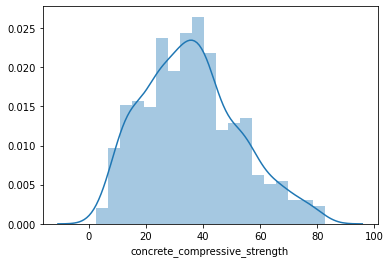

In [7]:
sns.distplot(df['concrete_compressive_strength'])
plt.show()

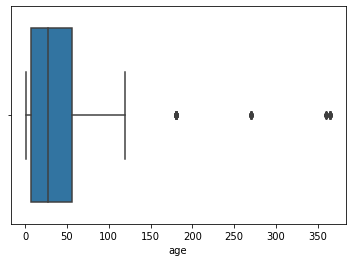

In [8]:
sns.boxplot(df['age'])
plt.show()

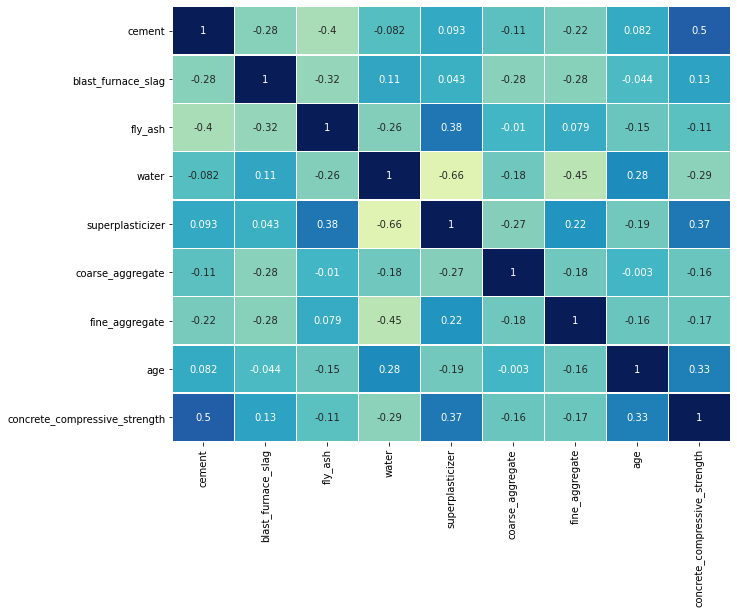

In [9]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [24]:
df['aggregate'] = df[['coarse_aggregate', 'fine_aggregate']].mean(axis = 1)
df.drop(['coarse_aggregate', 'fine_aggregate'], axis=1, inplace=True)
df['concrete_compressive_strength'] = df['concrete_compressive_strength'].astype(int)

In [25]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,age,concrete_compressive_strength,aggregate
0,540.0,0.0,0.0,162.0,2.5,28,79,858.00
1,540.0,0.0,0.0,162.0,2.5,28,61,865.50
2,332.5,142.5,0.0,228.0,0.0,270,40,763.00
3,332.5,142.5,0.0,228.0,0.0,365,41,763.00
4,198.6,132.4,0.0,192.0,0.0,360,44,901.95


In [26]:
all_features = df.columns.tolist()
all_features.remove('concrete_compressive_strength')

correlated_features = set()
correlation_threshold = 0.9

corr_df = df[all_features].corr()

for i in range(len(corr_df.columns)):
    for j in range(i):
        if abs(corr_df.iloc[i, j]) > correlation_threshold:
            colname = corr_df.columns[i]
            correlated_features.add(colname)

In [27]:
df.drop(columns=correlated_features, inplace=True)

for feature in correlated_features:
    all_features.remove(feature)

all_features

['cement',
 'blast_furnace_slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'age',
 'aggregate']

In [28]:
X = df[all_features]
y = df['concrete_compressive_strength']
SEED = 123

X_train, X_validation, y_train, y_validation = train_test_split(X,
                                                                y,
                                                                random_state = SEED)

## Creating the Model and Tuning It

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

score = lr.score(X_validation, y_validation)
print(f'Accuracy = {score}')

Accuracy = 0.6055823234700735


In [38]:
score_val = cross_val_score(lr, X, y, cv = 5)
score1 =score_val.mean()
print(f'Cross validation score = {score1}')

Cross validation score = 0.4746150119520813


In [34]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
score = dt.score(X_validation, y_validation)
print(f'Accuracy = {score}')

Accuracy = 0.8258215960398763


In [39]:
score_val = cross_val_score(dt, X, y, cv = 5)
score1 =score_val.mean()
print(f'Cross validation score = {score1}')

Cross validation score = 0.31478172952127703


In [35]:
from sklearn.ensemble import BaggingRegressor

bg = BaggingRegressor()
bg.fit(X_train, y_train)
score = bg.score(X_validation, y_validation)
print(f'Accuracy = {score}')

Accuracy = 0.9077128090873785


In [40]:
score_val = cross_val_score(bg, X, y, cv = 5)
score1 =score_val.mean()
print(f'Cross validation score = {score1}')

Cross validation score = 0.2676013426858458


In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = BaggingRegressor()
gbr.fit(X_train, y_train)
score = gbr.score(X_validation, y_validation)
print(f'Accuracy = {score}')

Accuracy = 0.914932254962699


In [41]:
score_val = cross_val_score(gbr, X, y, cv = 5)
score1 =score_val.mean()
print(f'Cross validation score = {score1}')

Cross validation score = 0.2641195820955998


In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
parameters = {'max_depth': [1,3,7,10],
              'max_features': ['auto', 'sqrt'],
              'n_estimators': [10,100,300,500]}


clf = RandomizedSearchCV(GradientBoostingRegressor(),
                         parameters,
                         cv = 5,
                         verbose = 2,
                         n_jobs= -1,
                        n_iter=10)
clf.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.9s finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 7, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 100, 300, 500]},
                   verbose=2)

In [45]:
clf.best_score_, clf.best_params_

(0.5572406396104805,
 {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 3})

In [46]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.065793,0.005350,0.004381,0.001469,100,sqrt,1,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.602826,0.649012,0.747232,0.755783,-0.588608,0.433249,0.514221,6
1,0.054904,0.007335,0.003221,0.000303,10,auto,10,"{'n_estimators': 10, 'max_features': 'auto', '...",0.384972,0.521207,0.615897,0.641074,-0.395592,0.353512,0.385177,8
2,0.143065,0.001649,0.003484,0.000441,300,sqrt,1,"{'n_estimators': 300, 'max_features': 'sqrt', ...",0.751918,0.671191,0.762253,0.882474,-0.417975,0.529972,0.478752,4
3,1.881276,0.061313,0.022002,0.018578,500,auto,10,"{'n_estimators': 500, 'max_features': 'auto', ...",0.624995,0.497353,0.725517,0.834996,-1.073960,0.321780,0.706718,10
4,0.245672,0.038224,0.004283,0.000911,300,sqrt,3,"{'n_estimators': 300, 'max_features': 'sqrt', ...",0.749299,0.712553,0.777777,0.913813,-0.367239,0.557241,0.467216,1
5,0.819305,0.042132,0.006706,0.002229,500,auto,3,"{'n_estimators': 500, 'max_features': 'auto', ...",0.705878,0.629290,0.785757,0.913832,-0.327904,0.541371,0.444721,3
6,0.028232,0.006764,0.004280,0.001868,10,sqrt,10,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.428410,0.545393,0.578174,0.583303,-0.372230,0.352610,0.366716,9
7,0.215837,0.014461,0.005274,0.004147,300,auto,1,"{'n_estimators': 300, 'max_features': 'auto', ...",0.758606,0.674125,0.785020,0.877877,-0.346224,0.549881,0.452742,2
8,0.147386,0.012147,0.003203,0.000292,100,auto,3,"{'n_estimators': 100, 'max_features': 'auto', ...",0.785319,0.677508,0.740442,0.888737,-0.725268,0.473348,0.603254,5
9,0.620973,0.106208,0.007418,0.000887,500,sqrt,7,"{'n_estimators': 500, 'max_features': 'sqrt', ...",0.814891,0.675297,0.718535,0.881011,-1.115292,0.394889,0.758517,7


In [71]:
parameters = {'max_depth': [1,3,7,10],
              'max_features': ['auto', 'sqrt'],
              'min_samples_split': [2, 4, 6]}


clf = RandomizedSearchCV(DecisionTreeRegressor(),
                         parameters,
                         cv = 5,
                         verbose = 2,
                         n_jobs= -1,
                         n_iter=10)
clf.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 7, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 4, 6]},
                   verbose=2)

In [72]:
clf.best_score_, clf.best_params_

(0.31999670205602393,
 {'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 10})

In [73]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005877,0.001149,0.004329,0.000864,2,sqrt,3,"{'min_samples_split': 2, 'max_features': 'sqrt...",0.113369,0.316511,0.289032,0.099903,-1.558244,-0.147886,0.710679,8
1,0.005040,0.000861,0.002878,0.000341,6,sqrt,7,"{'min_samples_split': 6, 'max_features': 'sqrt...",0.581659,-0.403671,0.316302,0.634330,-1.136214,-0.001519,0.677447,7
2,0.004013,0.000276,0.002545,0.000129,4,sqrt,3,"{'min_samples_split': 4, 'max_features': 'sqrt...",0.139243,0.103458,0.590933,0.223150,-0.652125,0.080932,0.405366,3
3,0.008037,0.001882,0.003546,0.001225,6,auto,10,"{'min_samples_split': 6, 'max_features': 'auto...",0.528248,0.384625,0.612619,0.712196,-0.835237,0.280490,0.568112,2
4,0.004064,0.000558,0.002467,0.000395,4,auto,3,"{'min_samples_split': 4, 'max_features': 'auto...",0.330910,0.442759,0.598529,0.467877,-1.696249,0.028765,0.866695,5
5,0.005267,0.000661,0.002713,0.000641,2,auto,10,"{'min_samples_split': 2, 'max_features': 'auto...",0.627415,0.484358,0.623524,0.782944,-0.918258,0.319997,0.626298,1
6,0.004604,0.001419,0.004184,0.001383,4,auto,1,"{'min_samples_split': 4, 'max_features': 'auto...",-0.609861,-0.055477,-0.113478,-0.525901,-0.971403,-0.455224,0.338212,10
7,0.004248,0.000426,0.002151,0.000481,6,sqrt,10,"{'min_samples_split': 6, 'max_features': 'sqrt...",0.313113,0.263491,0.152130,0.592755,-1.074489,0.049400,0.580395,4
8,0.004099,0.000669,0.002600,0.000663,2,auto,3,"{'min_samples_split': 2, 'max_features': 'auto...",0.330910,0.442759,0.598529,0.467877,-1.696249,0.028765,0.866695,5
9,0.004913,0.000306,0.004711,0.002380,6,sqrt,1,"{'min_samples_split': 6, 'max_features': 'sqrt...",-0.612135,-0.152637,0.154432,-0.525901,-0.971403,-0.421529,0.388232,9
